In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

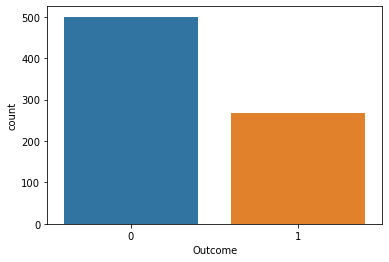

In [6]:
sns.countplot(df['Outcome'])

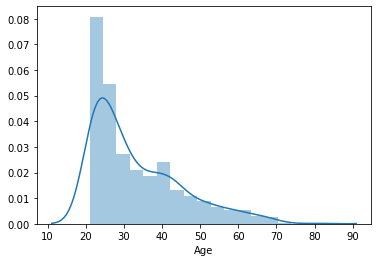

In [7]:
sns.distplot(df['Age'])

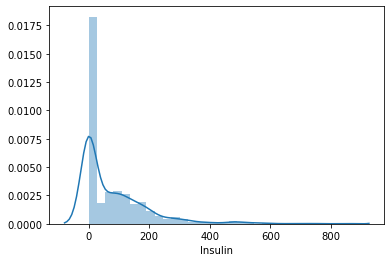

In [8]:
sns.distplot(df['Insulin'])

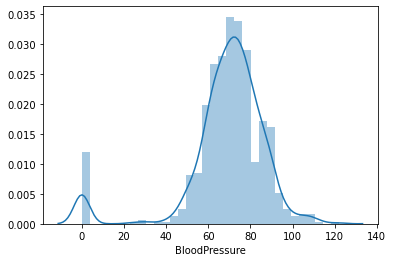

In [9]:
sns.distplot(df['BloodPressure'])

In [10]:
len(df[df['BloodPressure']==0])

35

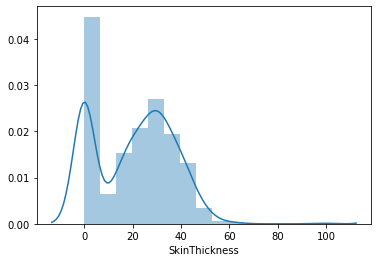

In [11]:
sns.distplot(df['SkinThickness'])

In [12]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [13]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [14]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60.0,20.536458,79.799479,30.1,0.349,47,1


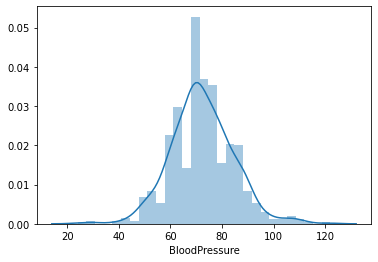

In [16]:
sns.distplot(df['BloodPressure'])

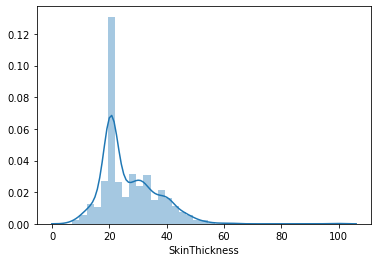

In [17]:
sns.distplot(df['SkinThickness'])

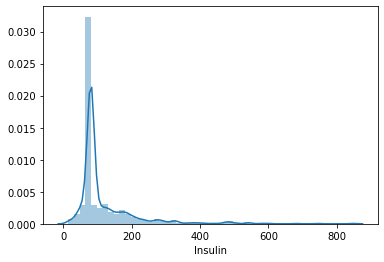

In [18]:
sns.distplot(df['Insulin'])

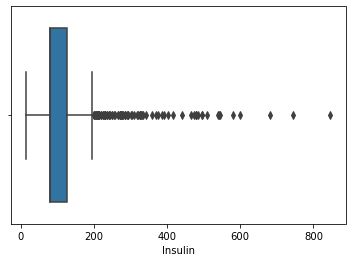

In [19]:
sns.boxplot(df['Insulin'])

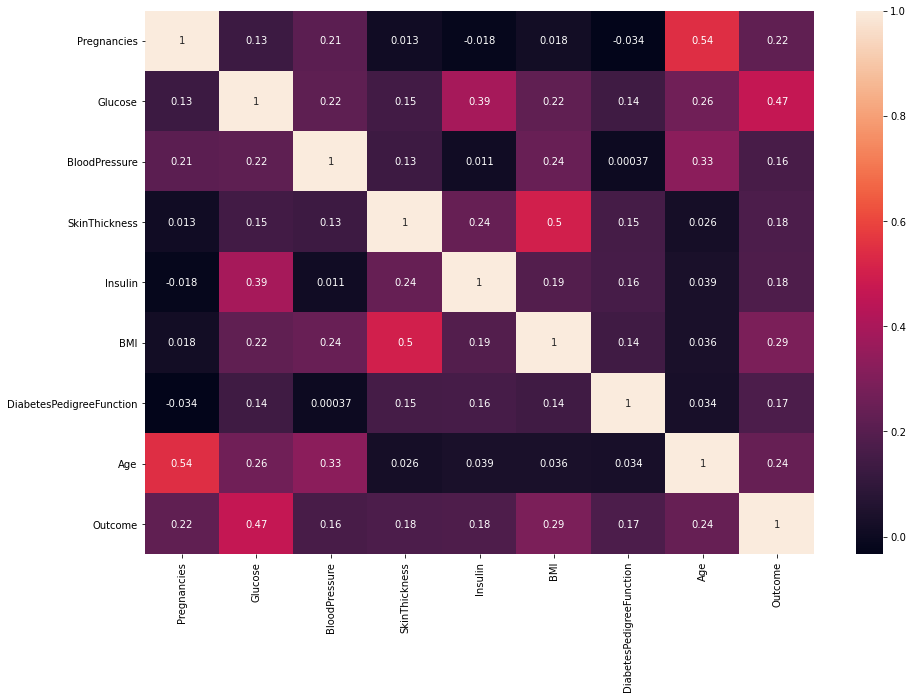

In [20]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [22]:
Y=df['Outcome']

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,random_state=None,shuffle=False)

for train_index,test_index in skf.split(X,Y):
    X_train,X_test = X.loc[train_index], X.loc[test_index]
    Y_train,Y_test = Y[train_index], Y[test_index]

In [26]:
x=sc.fit_transform(X_train)

In [27]:
x_test=sc.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
knc = KNeighborsClassifier(n_neighbors = 25)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()
abc = AdaBoostClassifier()

In [30]:
models = [lr, knc, dtc, rfc, svc, xgb, abc]
models_name = ['Logistic Regression', "K Neighbor Classifier", "Decision Tree Classifier", 'Random Forest Classifier','Support Vector Classifier', 'XGBoost Classifier','ADABoost Classifier']

In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 1000)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('rfc',rfc))
estimator.append(('KNN',knc))
estimator.append(('adaboost',abc))
  
# Voting Classifier with hard voting
vote= VotingClassifier(estimators = estimator,weights = [1,1],voting='soft')


In [33]:
for clf in(lr,svc,dtc,rfc,knc,abc):
    clf.fit(x,Y_train)
    ypred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(Y_test,ypred))

LogisticRegression 0.79296875
SVC 0.7890625
DecisionTreeClassifier 0.72265625
RandomForestClassifier 0.76953125
KNeighborsClassifier 0.796875
AdaBoostClassifier 0.78125


In [34]:
n=[10,25,30,40,50]
cr=['gini','auto','entropy']
ma=[x for x in range(20)]
min_ss=[2,3,4,5]
m=[2,3,4,5,6,7,8,9,10]

from sklearn.model_selection import GridSearchCV

In [35]:

para={'n_estimators':n,'criterion':cr,'max_depth':ma,'min_samples_split':min_ss,'max_leaf_nodes':m}


In [36]:
gd=GridSearchCV(estimator=rfc, param_grid=para, cv=5)

In [37]:
y_pred=lr.predict(x_test)

In [38]:
cm=confusion_matrix(Y_test,y_pred)

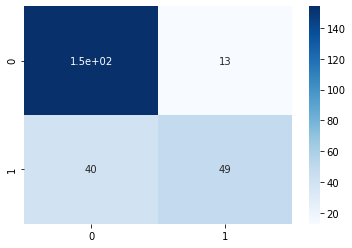

In [39]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [40]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       167
           1       0.79      0.55      0.65        89

    accuracy                           0.79       256
   macro avg       0.79      0.74      0.75       256
weighted avg       0.79      0.79      0.78       256



In [41]:
x_test.shape

(256, 8)

In [42]:
X.shape

(768, 8)

In [43]:
import pickle

In [48]:
file=open('diabetes.pkl','wb')
pickle.dump(lr,file)